# Taller modelos lineales


# Parte 1 - Regresión lineal

Estimar una regresión con los datos de ingresos


## Previsión de ingresos

Vamos a trabajar con un conjunto de datos del censo de EE.UU. indome ([diccionario de datos](https://archive.ics.uci.edu/ml/datasets/Adult))

A muchas empresas les gustaría personalizar su oferta en función de los ingresos del cliente. Los clientes con ingresos elevados podrían, por ejemplo, estar expuestos a productos premium. Como los ingresos de un cliente no siempre se conocen explícitamente, el modelo predictivo podría estimar los ingresos de una persona basándose en otra información.

Nuestro objetivo es crear un modelo predictivo que sea capaz de dar una estimación de los ingresos de una persona.


In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [2]:
income.shape

(32561, 15)

# Ejercicio 4.1 

¿Cuál es la relación entre la edad y la renta?



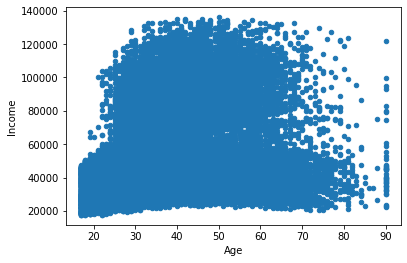

In [ ]:
income.plot(x='Age', y='Income', kind='scatter')

In [4]:
#A partir del grafico de dispersion se puede observar que la edad y el ingreso no tienen una relacion lineal clara,
# esto debido a que los datos presentan una alta dispersion y por tal motivo si se realiza un modelo de regresion lineal con estas
# variables el error del modelo sera muy alto y la prediccion se va a alejar de la correcta.

np.corrcoef(income["Age"], income["Income"]) #Evidencia que tienen una relacion positiva, sin embargo no es una relacion fuerte.

array([[1.       , 0.2904083],
       [0.2904083, 1.       ]])

# Ejercicio 4.2
Para un aumento del uno por ciento en la edad, ¿cuánto aumenta la renta?
Utilizando sklearn estime una regresión lineal y prediga los ingresos cuando la Edad es de 30 y 40 años.

In [14]:
X = income['Age'].values
Y = income['Income'].values

#Normalizar los datos
y_mean, y_std = Y.mean(), Y.std()
X_mean, X_std = X.mean(), X.std()

Y = (Y - y_mean)/ y_std
X = (X - X_mean)/ X_std

# Crar la matriz de X
MX = np.c_[np.ones(X.shape[0]), X]

In [15]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression(fit_intercept=False)
modelo.fit(MX, Y)
modelo.coef_

array([8.39066006e-17, 2.90408298e-01])

In [16]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

x1 = np.array([30])
x2 = np.array([40])

clf1 = LinearRegression()
clf1.fit(income[['Age']], income['Income'])
p1 = clf1.predict(x1.reshape(1, -1))                  #El aumento de un 1% de la edad aumenta en 33080 la renta
p2 = clf1.predict(x2.reshape(1, -1))

In [17]:
print(p1) #Preddiccion para la edad = 30
print(p2) #Preddiccion para la edad = 40

[48803.11784304]
[54224.79441376]



# Ejercicio 4.3

Ejecute un modelo de regresión utilizando como características la Edad y la Edad$^2$ utilizando las ecuaciones OLS. Prediga de nuevo los ingresos cuando la Edad es de 30 y 40 años, y compare con el modelo anterior.

In [37]:
income['Age2'] = income['Age'] ** 2

Y = income['Income'].values
X = income[['Age', 'Age2']].values

y_mean, y_std = Y.mean(), Y.std()
X_mean, X_std = X.mean(), X.std()

Y = (Y - y_mean)/ y_std
X = (X - X_mean)/ X_std

In [38]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True) 
ss.fit(X.astype(np.float))
X = ss.transform(X.astype(np.float))
print(ss.mean_, ss.scale_)

X_ = np.c_[np.ones(X.shape[0]), X] #Matriz de x
modelo = LinearRegression(fit_intercept=False)
modelo.fit(X_,Y)
print(modelo.coef_)


[-0.70033391  0.70033391] [0.01167801 1.00941986]
[ 8.39066006e-17  1.67751068e+00 -1.41415206e+00]


In [47]:
#Solucion para edad = 30

x = np.array([30, 30**2])

x_scaled = ss.transform(x.reshape(1, -1))
x_ = np.c_[1, x_scaled]
print(x_)

y_pred1 = 8.39066006e-17 + (1.67751068e+00)*(2.62890215e+03) + (1.41415206e+002)*(8.90907443e+02)
print("El valor de la prediccion es ", y_pred1)

[[1.00000000e+00 2.62890215e+03 8.90907443e+02]]
El valor de la prediccion es  130397.87101207822


In [49]:
#Solucion para edad = 30

x = np.array([40, 40**2])

x_scaled = ss.transform(x.reshape(1, -1))
x_ = np.c_[1, x_scaled]
print(x_)

y_pred2 = 8.39066006e-17 + (1.67751068e+00)*(3.48521275e+03) + (1.41415206e+002)*(1.58437507e+03)
print("El valor de la prediccion es ", y_pred2)

[[1.00000000e+00 3.48521275e+03 1.58437507e+03]]
El valor de la prediccion es  229901.20851551162


# Ejercicio 4.4
Estime una regresión utilizando más características, diga cuáles y por qué las usó. Prediga de nuevo los ingresos cuando la Edad es de 30 y 40 años, y compare con el modelo anterior.


In [80]:
#Segun la teoria las variables que mejor explican los niveles de ingreso de una persona, son la educacion, la edad, genero, pais entre otros
#Para el siguiente modelo se van a trabajar las variables numericas de la base de datos

In [57]:
income.columns.values

array(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country',
       'Income', 'Age2'], dtype=object)

In [72]:
Y = income['Income'].values
X1 = income['Age'].values
X2 = income['Sex'].values
X3 = income['Education-Num'].values
X4 = income['Hours per week'].values
X5 = income['fnlwgt'].values

X = income[['Education', 'Sex','Country','Hours per week','Race']].values

In [73]:
import pandas as pd                    ## Este proporciona una estructura similiar a los data.frame
import statsmodels.api as sm           ## Este proporciona funciones para la estimación de muchos modelos estadísticos
import statsmodels.formula.api as sm

In [74]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Y ~ X1 + X2 + X3 + X4 + X5', data= income).fit() 
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     5129.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:23:34   Log-Likelihood:            -3.6708e+05
No. Observations:               32561   AIC:                         7.342e+05
Df Residuals:                   32555   BIC:                         7.342e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.787e+04    626.197    -44.508      0.0

In [71]:
modelo.params #Parametros del modelo

Intercept    -27870.629074
X2[T.Male]    20633.063500
X1              437.896666
X3             3960.065939
X4              250.341453
X5                0.003059
dtype: float64

In [82]:
#Prediccion para edad = 30 y 40 manteniendo todo lo demas constante

y_est1 = -27870.629074 + 437.896666*30 + 20633.063500 +3960.065939 + 250.341453 + 0.003059
y_est2 = -27870.629074 + 437.896666*40 + 20633.063500 + 3960.065939 + 250.341453 + 0.003059

print(y_est1)
print(y_est2)

10109.744857
14488.711517000002


#Parte 2: Regresión Logística

### Customer Churn: 
La pérdida/abandono de los clientes de la empresa. Especialmente, las industrias que la adquisición de usuarios es costosa, es de crucial importancia para una empresa para reducir e idealmente hacer que la rotación de clientes a 0 para mantener sus ingresos recurrentes. Si se considera que la retención de clientes es siempre más barata que la adquisición de clientes y generalmente depende de los datos del usuario (uso del servicio o producto), plantea un gran/excitante/difícil problema para el aprendizaje automático.

### Datos
El conjunto de datos procede de un proveedor de servicios de telecomunicaciones en el que se recoge el uso del servicio (plan internacional, plan de buzón de voz, uso diurno, uso nocturno, etc.) y la información demográfica básica (estado y código de área) del usuario. En el caso de las etiquetas, tengo un único punto de datos que indica si el cliente ha sido dado de baja o no.


In [83]:
# Download the dataset
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')

In [84]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [85]:
data['Churn?'].value_counts()

False.    2850
True.      483
Name: Churn?, dtype: int64

# Ejercicio 4.5

¿Cuál es la distribución de los churners? Haga la transformación correspondiente para predecir Churn.



In [86]:
#Transformacion: Se añadio una columna en la cual los valores de False.= 0 y True. =  1
data['Churn'] = data['Churn?'].map({"False.":0, "True.":1})   

In [87]:
data['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [ ]:
#Es una distribucion bernoulli ya que solo existen dos posibles resultados que son 1 y 0
# p y 1-p 

# Ejercicio 4.6
Entrene una Regresión Logística creando Y y X con la información en IntlCharge.


Text(0, 0.5, 'Churn')

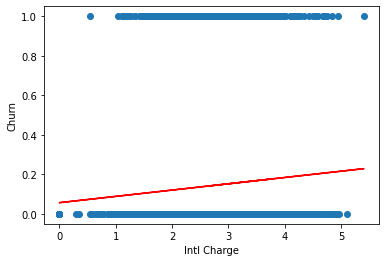

In [88]:
X = data['Intl Charge']
Y = data['Churn']

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['Intl Charge']                             # definir las caracteristicas es decir las x's
X = data[feature_cols]                           # Data set 1 variables independientes
Y = data.Churn
linreg.fit(X, Y) 
data['Churn_pred'] = linreg.predict(X)

plt.scatter(data['Intl Charge'] , data.Churn)
plt.plot(data['Intl Charge'] , data.Churn_pred, color='red')
plt.xlabel('Intl Charge')
plt.ylabel('Churn')

In [89]:
data['Churn_pred'].describe()

count    3333.000000
mean        0.144914
std         0.024032
min         0.056775
25%         0.130103
50%         0.145406
75%         0.161028
max         0.228936
Name: Churn_pred, dtype: float64

Text(0, 0.5, 'Churn')

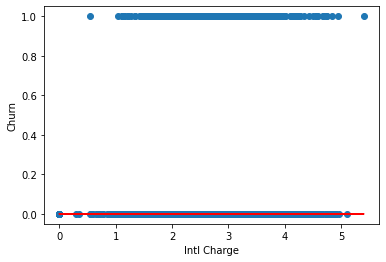

In [91]:
data['Churn_pred_class'] = np.where(data.Churn_pred >= 0.5, 1, 0) 

plt.scatter(data['Intl Charge'], data['Churn'])
plt.plot(data['Intl Charge'], data.Churn_pred_class, color='red')
plt.xlabel('Intl Charge')
plt.ylabel('Churn')

In [95]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)
feature_cols = ['Intl Charge']         #al como variable independiente
X = data[feature_cols]
Y = data.Churn          #Variable dependiente
logreg.fit(X, Y)            #Ajustar la regresion
data['Churn_pred_class'] = logreg.predict(X)

In [96]:
data['Churn_pred_prob'] = logreg.predict_proba(X)[:, 1]

Text(0, 0.5, 'Churn')

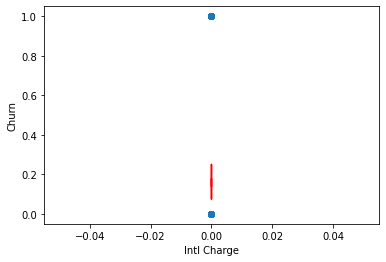

In [97]:
plt.scatter(data['Churn_pred_class'] , data.Churn)
plt.plot(data['Churn_pred_class'] , data.Churn_pred_prob, color='red')
plt.xlabel('Intl Charge')
plt.ylabel('Churn')

In [99]:
print(logreg.predict_proba([[1]]))
print(logreg.predict_proba([[2]]))
print(logreg.predict_proba([[3]]))

[[0.90480943 0.09519057]]
[[0.8796801 0.1203199]]
[[0.84902381 0.15097619]]


# Ejercicio 4.7

¿Cuáles son los coeficientes de la regresión logística? Interpretelos para un valor de IntlCharge = 1.




In [100]:
print(logreg.predict_proba([[1]]))

[[0.90480943 0.09519057]]


In [101]:
logreg.coef_

array([[0.2624392]])

# Ejercicio 4.8

Seleccione 3 variables independientes para entrenar una regresión logística. Interprete cada uno de los valores de los coeficientes en función de la variable churn.


In [103]:
data.columns.values

array(['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan",
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls',
       'Intl Charge', 'CustServ Calls', 'Churn?', 'Churn', 'Churn_pred',
       'Churn_pred_class', 'Churn_pred_prob'], dtype=object)

In [111]:
#Tomaria las llamadas tanto dia, tarde y noche: 'Day Calls', Eve Calls', 'Night Calls'


Text(0, 0.5, 'Churn')

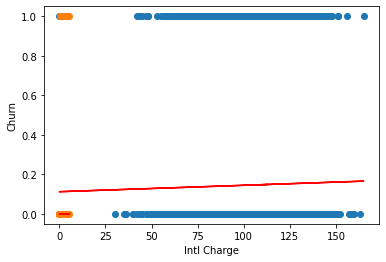

In [106]:
X = data['Day Calls']
Y = data['Churn']

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['Day Calls']                             # definir las caracteristicas es decir las x's
X = data[feature_cols]                           # Data set 1 variables independientes
Y = data.Churn
linreg.fit(X, Y) 
data['Churn_pred'] = linreg.predict(X)

plt.scatter(data['Day Calls'] , data.Churn)
plt.plot(data['Day Calls'] , data.Churn_pred, color='red')
plt.xlabel('Day Calls')
plt.ylabel('Churn')


Text(0, 0.5, 'Churn')

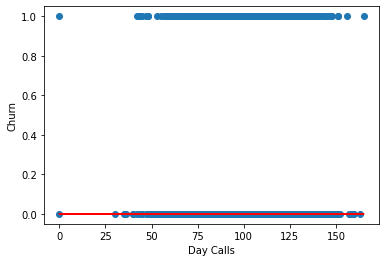

In [107]:
data['Churn_pred_class'] = np.where(data.Churn_pred >= 0.5, 1, 0) 

plt.scatter(data['Day Calls'], data['Churn'])
plt.plot(data['Day Calls'], data.Churn_pred_class, color='red')
plt.xlabel('Day Calls')
plt.ylabel('Churn')

In [109]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)
feature_cols = ['Day Calls']         #al como variable independiente
X = data[feature_cols]
Y = data.Churn          #Variable dependiente
logreg.fit(X, Y)            #Ajustar la regresion
data['Churn_pred_class'] = logreg.predict(X)


data['Churn_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [110]:
logreg.coef_ #COEFICIENTE 1

array([[0.00236655]])

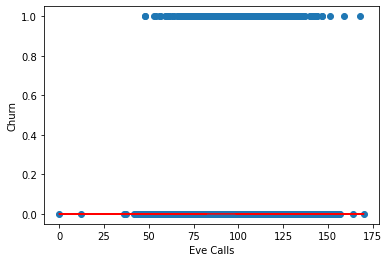

In [113]:
X = data['Eve Calls']
Y = data['Churn']

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['Eve Calls']                             # definir las caracteristicas es decir las x's
X = data[feature_cols]                           # Data set 1 variables independientes
Y = data.Churn
linreg.fit(X, Y) 
data['Churn_pred'] = linreg.predict(X)

data['Churn_pred_class'] = np.where(data.Churn_pred >= 0.5, 1, 0) 

plt.scatter(data['Eve Calls'], data['Churn'])
plt.plot(data['Eve Calls'], data.Churn_pred_class, color='red')
plt.xlabel('Eve Calls')
plt.ylabel('Churn')

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)
feature_cols = ['Eve Calls']         #al como variable independiente
X = data[feature_cols]
Y = data.Churn          #Variable dependiente
logreg.fit(X, Y)            #Ajustar la regresion
data['Churn_pred_class'] = logreg.predict(X)

data['Churn_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [114]:
logreg.coef_ #COEFICIENTE 2

array([[0.00116127]])

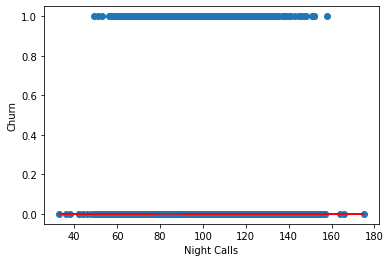

In [115]:
X = data['Night Calls']
Y = data['Churn']

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['Night Calls']                             # definir las caracteristicas es decir las x's
X = data[feature_cols]                           # Data set 1 variables independientes
Y = data.Churn
linreg.fit(X, Y) 
data['Churn_pred'] = linreg.predict(X)

data['Churn_pred_class'] = np.where(data.Churn_pred >= 0.5, 1, 0) 

plt.scatter(data['Night Calls'], data['Churn'])
plt.plot(data['Night Calls'], data.Churn_pred_class, color='red')
plt.xlabel('Night Calls')
plt.ylabel('Churn')

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)
feature_cols = ['Night Calls']         #al como variable independiente
X = data[feature_cols]
Y = data.Churn          #Variable dependiente
logreg.fit(X, Y)            #Ajustar la regresion
data['Churn_pred_class'] = logreg.predict(X)

data['Churn_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [116]:
logreg.coef_ #COEFICIENTE 3

array([[0.00078058]])